In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("E-commerce Customer Behavior - Sheet1.csv")
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [7]:
df.tail()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral
349,450,Female,43,Chicago,Bronze,515.75,10,3.3,True,49,Unsatisfied


In [8]:
df.size

3850

In [10]:
df.shape

(350, 11)

In [65]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [66]:
df.describe(include=("O"))

,Gender,City,Membership Type,Satisfaction Level
count,350,350,350,348
unique,2,6,3,3
top,Female,New York,Gold,Satisfied
freq,175,59,117,125


In [13]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [55]:
# split columns in num and object
def Split_num_obj(df):
    
    df_num = df.select_dtypes(include=['number','bool']).copy()
    df_obj = df.select_dtypes(exclude=['number','bool']).copy()

    # convert bool into 0/1
    for col in df_num.select_dtypes(include='bool').columns:
        df_num[col] = df_num[col].astype(int)

    return df_num, df_obj

In [56]:
df_num, df_obj,= Split_num_obj(df)

In [61]:
df_num.isnull().sum()
df_obj.isnull().sum()

Gender                0
City                  0
Membership Type       0
Satisfaction Level    0
dtype: int64

In [78]:
df_num.shape

(350, 7)

## check Distribution of every columns

### Numerical columns

<Axes: xlabel='Age', ylabel='Count'>

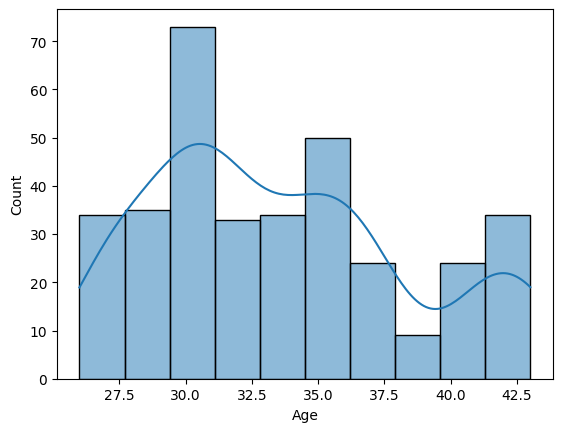

In [92]:
sns.histplot(df_num['Age'], kde=True)

<Axes: xlabel='Average Rating', ylabel='Count'>

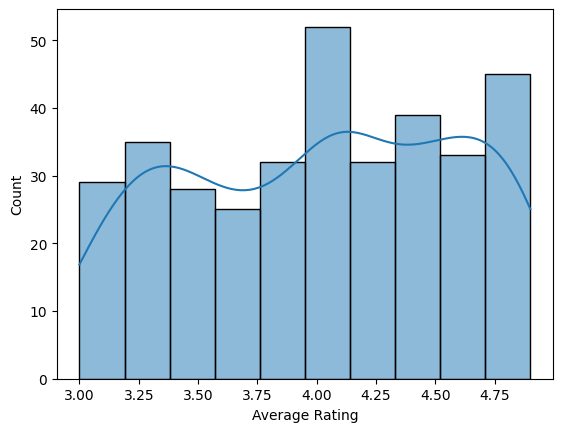

In [93]:
sns.histplot(df_num['Average Rating'], kde=True)

<Axes: xlabel='Days Since Last Purchase', ylabel='Count'>

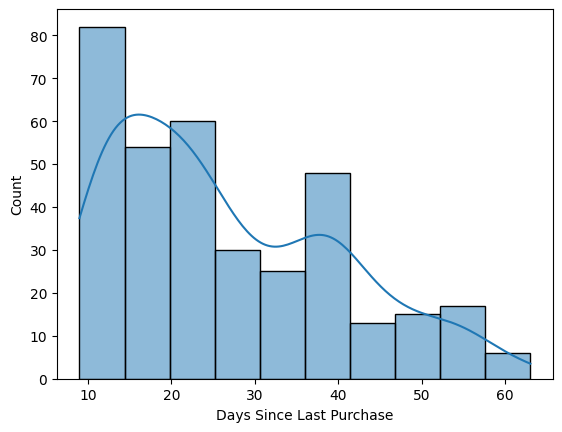

In [94]:
sns.histplot(df_num['Days Since Last Purchase'], kde=True)

<Axes: xlabel='Discount Applied', ylabel='Count'>

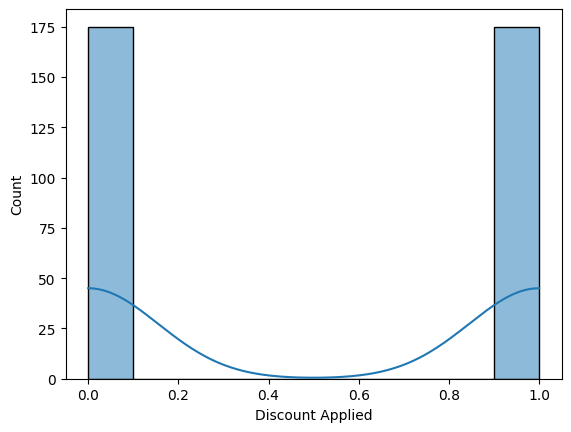

In [95]:
sns.histplot(df_num['Discount Applied'], kde=True)

<Axes: xlabel='Total Spend', ylabel='Count'>

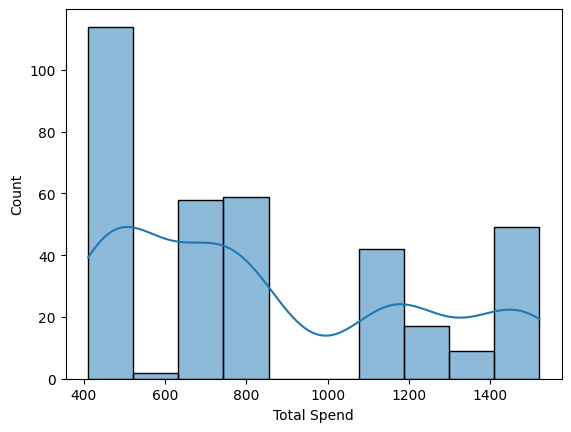

In [96]:
sns.histplot(df_num['Total Spend'], kde=True)

<Axes: xlabel='Items Purchased', ylabel='Count'>

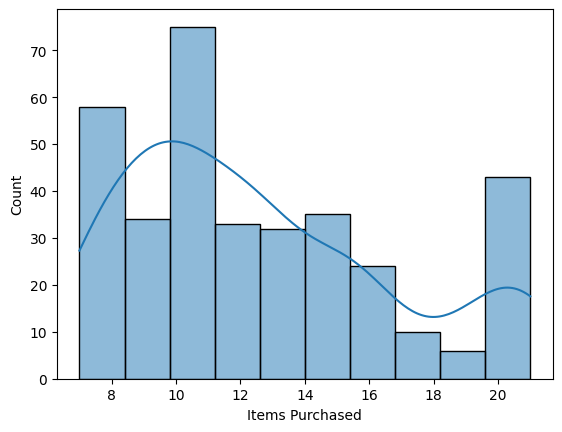

In [97]:
sns.histplot(df_num['Items Purchased'], kde=True)

In [101]:
df_num = df_num.drop(columns=['Customer ID'])
df_num.columns

Index(['Age', 'Total Spend', 'Items Purchased', 'Average Rating',
       'Discount Applied', 'Days Since Last Purchase'],
      dtype='object')

### Cetagorical Columns

<Axes: xlabel='City', ylabel='Count'>

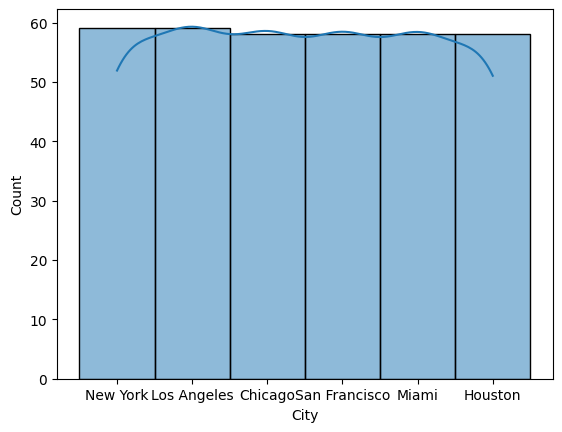

In [102]:
sns.histplot(df_obj['City'], kde=True)

<Axes: xlabel='Membership Type', ylabel='Count'>

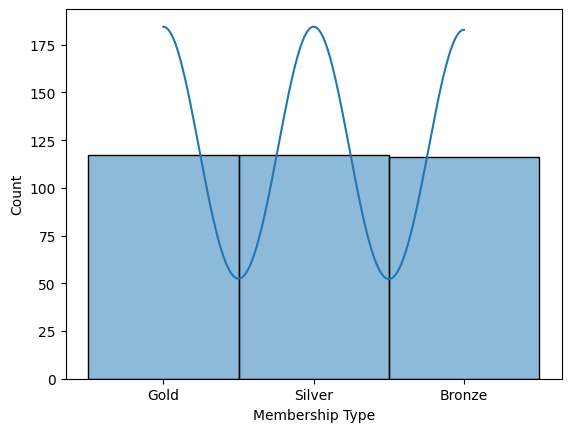

In [104]:
sns.histplot(df_obj['Membership Type'], kde=True)

<Axes: xlabel='Satisfaction Level', ylabel='Count'>

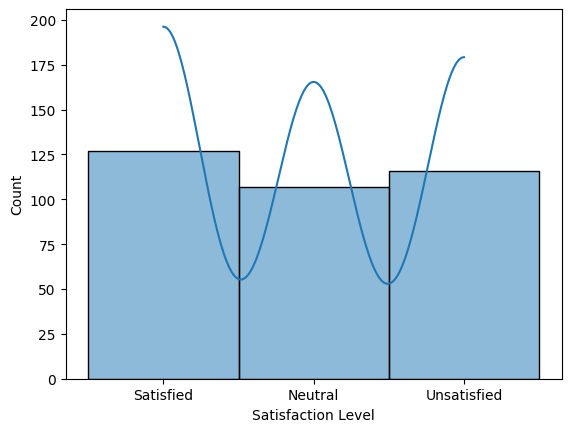

In [105]:
sns.histplot(df_obj['Satisfaction Level'], kde=True)

## fill the null value 

In [58]:
df_obj['Satisfaction Level'].unique()

array(['Satisfied', 'Neutral', 'Unsatisfied', nan], dtype=object)

In [59]:
df_obj['Satisfaction Level'].value_counts()

Satisfaction Level
Satisfied      125
Unsatisfied    116
Neutral        107
Name: count, dtype: int64

In [60]:
mode_value = df_obj['Satisfaction Level'].mode()[0]
df_obj['Satisfaction Level'].fillna(mode_value , inplace=True)

C:\Users\rashi\AppData\Local\Temp\ipykernel_9668\3187876385.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_obj['Satisfaction Level'].fillna(mode_value , inplace=True)


## ploting the graph

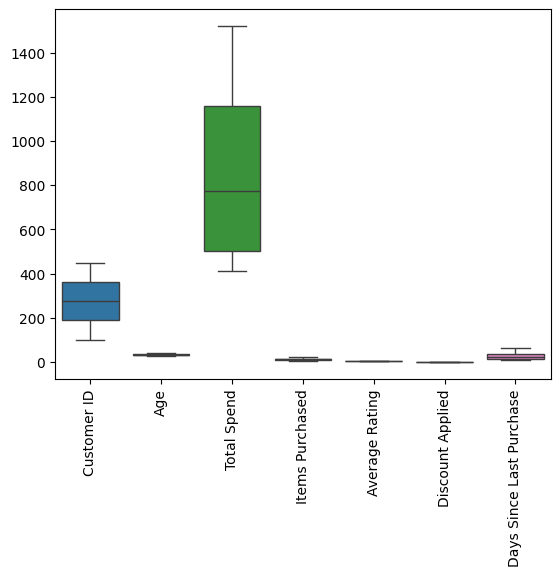

In [70]:
sns.boxplot(df_num)
plt.xticks(rotation = 90)
plt.show()

In [108]:
df_obj.head()

,Gender,City,Membership Type,Satisfaction Level
0,Female,New York,Gold,Satisfied
1,Male,Los Angeles,Silver,Neutral
2,Female,Chicago,Bronze,Unsatisfied
3,Male,San Francisco,Gold,Satisfied
4,Male,Miami,Silver,Unsatisfied


## Encoding and Scaling

In [107]:
# Scaling of Total Spend
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_num['Total Spend'] = scaler.fit_transform(df[['Total Spend']])
df_num['Total Spend']

0      0.639502
1      0.333273
2      0.090102
3      0.964122
4      0.279095
         ...   
345    0.224917
346    0.053818
347    0.703146
348    0.333003
349    0.094609
Name: Total Spend, Length: 350, dtype: float64

In [109]:
# one-hot encoding (Gender	City	Membership Type)
x = pd.get_dummies(df[['Gender','City',	'Membership Type',]])

In [111]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df[['Satisfaction Level']])

c:\Users\rashi\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### A final df

In [ ]:
df_final = pd.concat([df_num.reset_index(drop=True),x.reset_index(drop=True)], axis=1)

In [116]:
df_final['Satisfaction Level'] = y

In [117]:
df_final

,Age,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Gender_Female,Gender_Male,City_Chicago,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Membership Type_Bronze,Membership Type_Gold,Membership Type_Silver,Satisfaction Level
0,29,0.639502,14,4.6,1,25,True,False,False,False,False,False,True,False,False,True,False,1
1,34,0.333273,11,4.1,0,18,False,True,False,False,True,False,False,False,False,False,True,0
2,43,0.090102,9,3.4,1,42,True,False,True,False,False,False,False,False,True,False,False,2
3,30,0.964122,19,4.7,0,12,False,True,False,False,False,False,False,True,False,True,False,1
4,27,0.279095,13,4.0,1,55,False,True,False,False,False,True,False,False,False,False,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,32,0.224917,10,3.8,1,42,False,True,False,False,False,True,False,False,False,False,True,2
346,36,0.053818,8,3.0,0,27,True,False,False,True,False,False,False,False,True,False,False,0
347,30,0.703146,16,4.5,1,28,True,False,False,False,False,False,True,False,False,True,False,1
348,34,0.333003,11,4.2,0,21,False,True,False,False,True,False,False,False,False,False,True,0


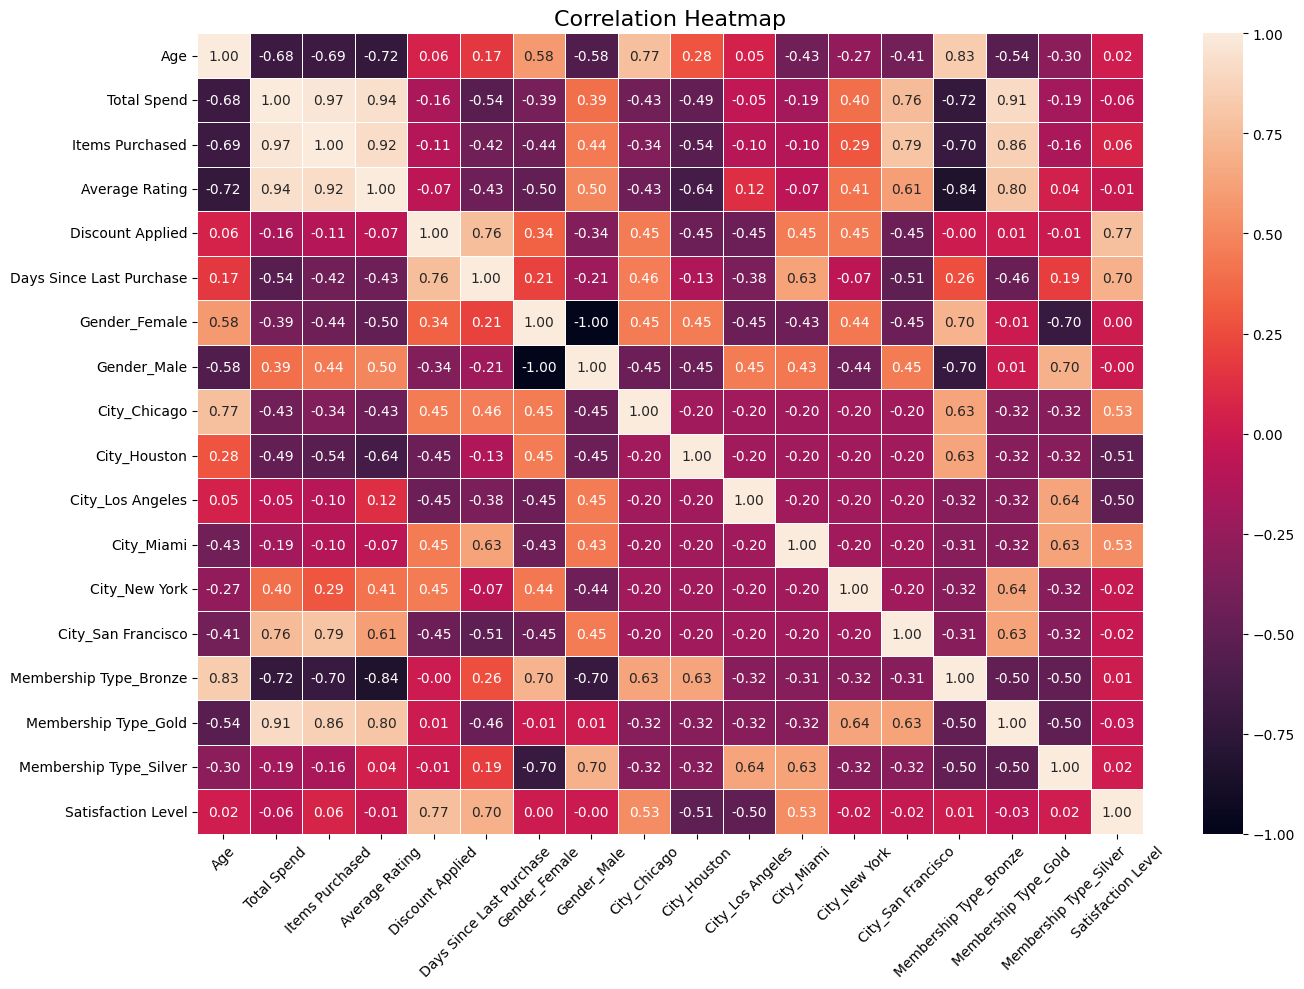

In [118]:

# correlation matrix
corr = df_final.corr(numeric_only=True)

# BIG heatmap
plt.figure(figsize=(14, 10))  # ✅ bigger size
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [119]:
df_final.columns

Index(['Age', 'Total Spend', 'Items Purchased', 'Average Rating',
       'Discount Applied', 'Days Since Last Purchase', 'Gender_Female',
       'Gender_Male', 'City_Chicago', 'City_Houston', 'City_Los Angeles',
       'City_Miami', 'City_New York', 'City_San Francisco',
       'Membership Type_Bronze', 'Membership Type_Gold',
       'Membership Type_Silver', 'Satisfaction Level'],
      dtype='object')

In [120]:
df_final = df_final.drop(columns=['Membership Type_Bronze',
                                  'Membership Type_Gold',
                                  'Membership Type_Silver',
                                  'Gender_Female',
                                  'Gender_Male',
                                  'Average Rating',
                                  'Age',
                                  'Total Spend'
                                  ])

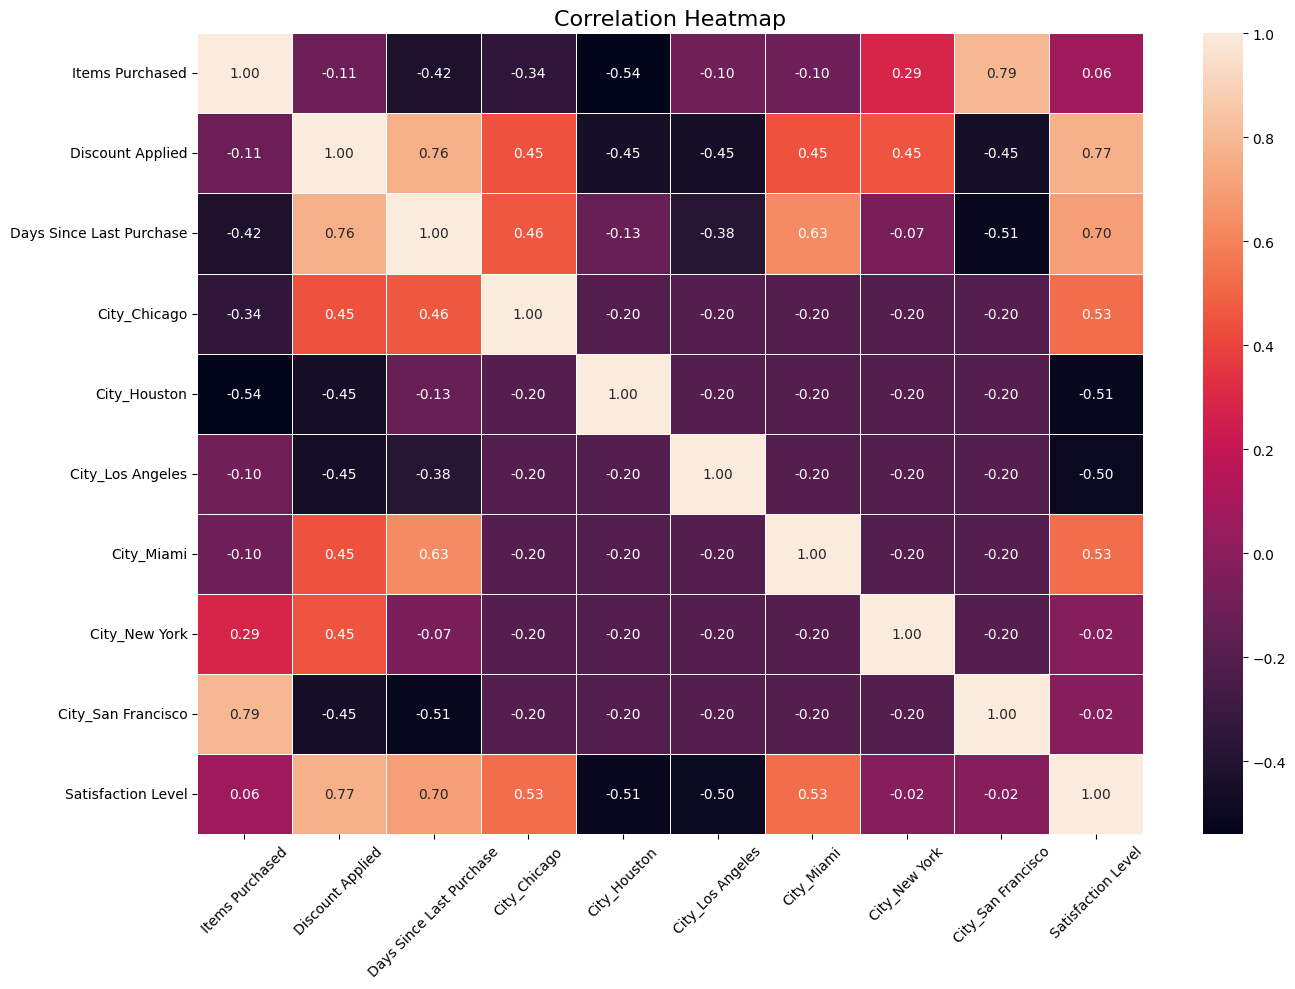

In [121]:
# correlation matrix
corr = df_final.corr(numeric_only=True)

# BIG heatmap
plt.figure(figsize=(14, 10))  # ✅ bigger size
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [122]:
x = df_final.drop(columns=['Satisfaction Level'])
y = df_final['Satisfaction Level']

In [123]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [124]:
y

0      1
1      0
2      2
3      1
4      2
      ..
345    2
346    0
347    1
348    0
349    2
Name: Satisfaction Level, Length: 350, dtype: int64

In [125]:
x

,Items Purchased,Discount Applied,Days Since Last Purchase,City_Chicago,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco
0,14,1,25,False,False,False,False,True,False
1,11,0,18,False,False,True,False,False,False
2,9,1,42,True,False,False,False,False,False
3,19,0,12,False,False,False,False,False,True
4,13,1,55,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
345,10,1,42,False,False,False,True,False,False
346,8,0,27,False,True,False,False,False,False
347,16,1,28,False,False,False,False,True,False
348,11,0,21,False,False,True,False,False,False


In [126]:
from sklearn.preprocessing import StandardScaler

scaler_s = StandardScaler()
x_train = scaler_s.fit_transform(x_train)
x_test = scaler_s.fit_transform(x_test)

In [128]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
model = lr.fit(x_train,y_train)

In [129]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

y_pred = model.predict(x_test)

In [133]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9904761904761905


In [134]:
print(confusion_matrix(y_test, y_pred))

[[41  0  0]
 [ 1 39  0]
 [ 0  0 24]]


In [135]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        41
           1       1.00      0.97      0.99        40
           2       1.00      1.00      1.00        24

    accuracy                           0.99       105
   macro avg       0.99      0.99      0.99       105
weighted avg       0.99      0.99      0.99       105



In [130]:
y_pred

array([0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1, 2, 0, 2, 2, 1, 1,
       2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0,
       2, 2, 1, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2,
       0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0])

In [136]:
import pickle

# Save model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save scaler
with open("scaler_s.pkl", "wb") as f:
    pickle.dump(scaler, f)
